<a href="https://colab.research.google.com/github/YassGan/MakeMore/blob/main/makemore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
names=open("names.txt","r").read().splitlines()



In [17]:
b={}
for w in names[:1]:
    print(w)
    chs=['.']+list(w)+['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        print(ch1, ch2)
        bigram=(ch1,ch2)
        b[bigram]=b.get(bigram,0)+1

emma
. e
e m
m m
m a
a .


In [18]:
sorted(b.items(),key=lambda kv: -kv[1])

[(('.', 'e'), 1),
 (('e', 'm'), 1),
 (('m', 'm'), 1),
 (('m', 'a'), 1),
 (('a', '.'), 1)]

In [19]:
chars=sorted(list(set(''.join(names))))
stoi={s:i+1 for i,s in enumerate( chars)}
stoi['.']=0


In [20]:
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [21]:
itos={i:s for s,i in stoi.items()}

In [22]:
import torch

In [23]:
N=torch.zeros(27,27,dtype=torch.int32)

for w in names:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1



(np.float64(-0.5), np.float64(26.5), np.float64(26.5), np.float64(-0.5))

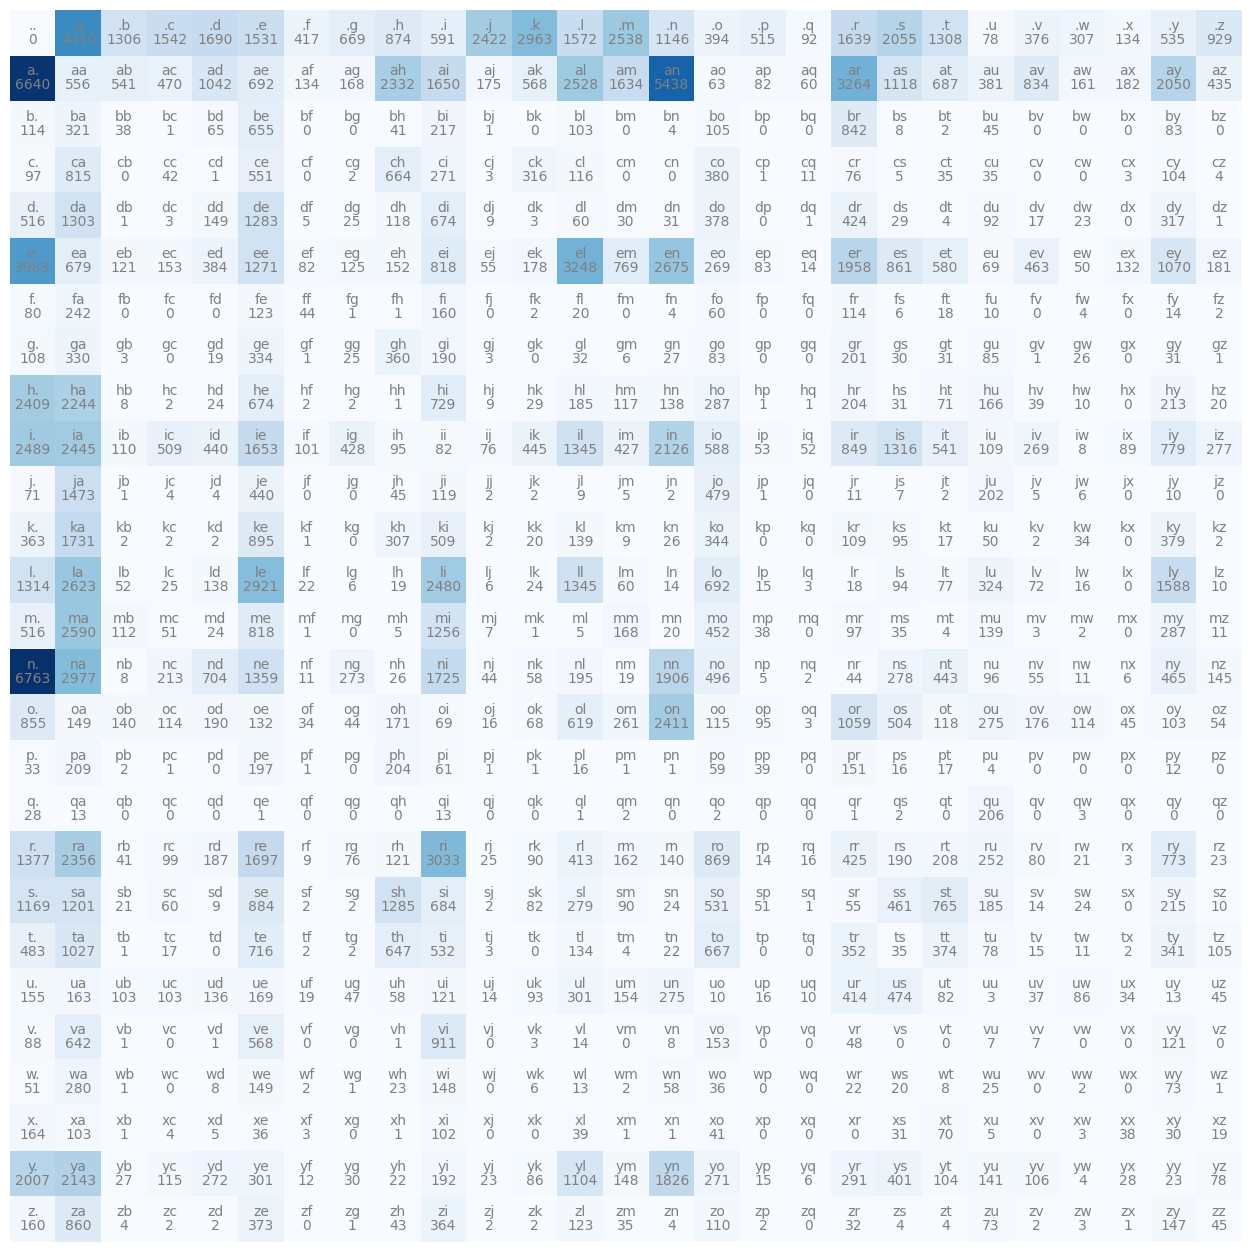

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,16))
plt.imshow(N,cmap='Blues')
for i in range (27):
  for j in range (27):
    chstr=itos[i] + itos[j]
    plt.text(j,i,chstr,ha='center',va='bottom',color='gray')
    plt.text(j,i,N[i,j].item(), ha="center", va="top", color="gray")
plt.axis('off')

In [25]:
for n in names:
  if n[:3]=="mem":
    print (n)

memphis
memory
memorie
memori
memphis
memphys


In [29]:
g=torch.Generator().manual_seed(2147483647)
p=torch.rand(3,generator=g)
p=p/p.sum()

In [30]:
p

tensor([0.6064, 0.3033, 0.0903])

In [35]:
z=torch.multinomial(p, num_samples=1, replacement=True, generator=g)

In [36]:
z

tensor([21])

In [42]:
P=N.float()
P/=P.sum(1,keepdims=True) #This sums over a row of the matrix and keepdims keeps the dimension

In [43]:
P

tensor([[0.0000e+00, 1.3767e-01, 4.0770e-02, 4.8138e-02, 5.2758e-02, 4.7794e-02,
         1.3018e-02, 2.0885e-02, 2.7284e-02, 1.8450e-02, 7.5610e-02, 9.2498e-02,
         4.9074e-02, 7.9231e-02, 3.5776e-02, 1.2300e-02, 1.6077e-02, 2.8720e-03,
         5.1166e-02, 6.4153e-02, 4.0833e-02, 2.4350e-03, 1.1738e-02, 9.5839e-03,
         4.1832e-03, 1.6702e-02, 2.9001e-02],
        [1.9596e-01, 1.6408e-02, 1.5966e-02, 1.3870e-02, 3.0751e-02, 2.0422e-02,
         3.9546e-03, 4.9579e-03, 6.8821e-02, 4.8694e-02, 5.1645e-03, 1.6763e-02,
         7.4605e-02, 4.8222e-02, 1.6048e-01, 1.8592e-03, 2.4199e-03, 1.7707e-03,
         9.6326e-02, 3.2994e-02, 2.0274e-02, 1.1244e-02, 2.4613e-02, 4.7514e-03,
         5.3711e-03, 6.0499e-02, 1.2838e-02],
        [4.3100e-02, 1.2136e-01, 1.4367e-02, 3.7807e-04, 2.4575e-02, 2.4764e-01,
         0.0000e+00, 0.0000e+00, 1.5501e-02, 8.2042e-02, 3.7807e-04, 0.0000e+00,
         3.8941e-02, 0.0000e+00, 1.5123e-03, 3.9698e-02, 0.0000e+00, 0.0000e+00,
         3.1834e-

(np.float64(-0.5), np.float64(26.5), np.float64(26.5), np.float64(-0.5))

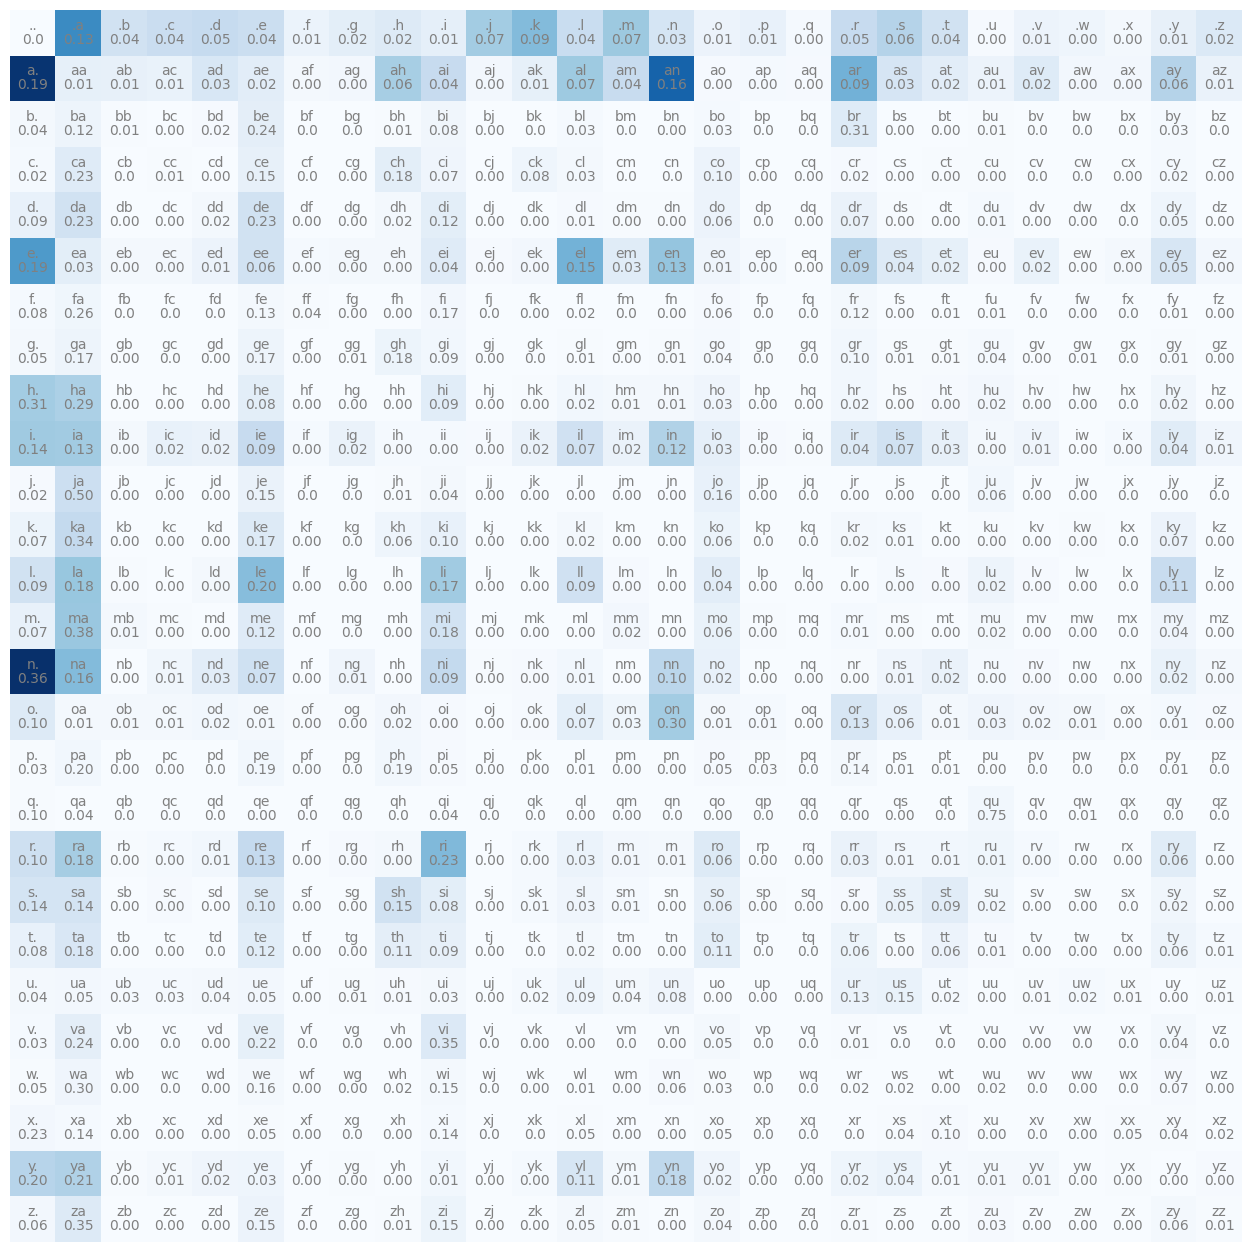

In [59]:
#Displaying the matrix probabilities
import matplotlib.pyplot as plt

plt.figure(figsize=(16,16))
plt.imshow(N,cmap='Blues')
for i in range (27):
  for j in range (27):
    chstr=itos[i] + itos[j]
    plt.text(j,i,chstr,ha='center',va='bottom',color='gray')
    plt.text(j,i,str(P[i, j].item())[:4], ha="center", va="top", color="gray")
plt.axis('off')

In [46]:
g=torch.Generator().manual_seed(2147483647)

for i in range(10):
  out=[]
  ix=0
  while True:
    p=P[ix]
    ix=torch.multinomial(p,num_samples=1,replacement=True,generator=g).item()
    itos[ix]
    out.append(itos[ix])
    if ix==0:
      break
  print(''.join(out))

junide.
janasah.
p.
cony.
a.
nn.
kohin.
tolian.
juee.
ksahnaauranilevias.


In [61]:
##loss function

log_likelihood=0.0
n=0

for w in ['anin']:
  chs=['.']+list(w)+['.']
  for ch1, ch2 in zip(chs,chs[1:]):
    ix1=stoi[ch1]
    ix2=stoi[ch2]
    prob=P[ix1,ix2]
    logprob=torch.log(prob)
    log_likelihood+=logprob
    n+=1
    print(f'{ch1}{ch2}:{prob:.4f}:{logprob:.4f}')
print(f'{log_likelihood=}')
nll= -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

.a:0.1377:-1.9829
an:0.1605:-1.8296
ni:0.0941:-2.3631
in:0.1201:-2.1194
n.:0.3690:-0.9969
log_likelihood=tensor(-9.2919)
nll=tensor(9.2919)
1.8583778142929077
